<a href="https://colab.research.google.com/github/jarodchristiansen/PythonProjects/blob/master/Bitcoin_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests
!pip install pandas
!pip install numpy

In [2]:
import requests
from prettytable import PrettyTable
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

import pandas as pd
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.colab import drive, files
drive.mount('/content/drive')
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cycles = []
urls = []
from datetime import datetime  
from datetime import timedelta  

timer = datetime.date(datetime(year=2020, month=5, day=3)) 

for i in range(1):
 timer = timer + timedelta(days=1)
 #cycles.append(timer)
 print(timer)
 urls.append('https://rest.coinapi.io/v1/ohlcv/BTC/USD/history?period_id=1DAY&time_start={}T00:00:00'.format(timer))

2020-05-04


In [ ]:
cycles

[]

In [ ]:
urls

In [ ]:
apikey = ''
datas = []
headers = {
    'X-CoinAPI-Key': apikey
}
for url in urls:
 response = requests.get(url, headers=headers).json()
 datas.append(response)

In [ ]:
datas[89]

[{'price_close': 11810.07,
  'price_high': 11894.73,
  'price_low': 11228.0,
  'price_open': 11351.61,
  'time_close': '2020-08-01T23:59:59.9607290Z',
  'time_open': '2020-08-01T00:00:00.2127820Z',
  'time_period_end': '2020-08-02T00:00:00.0000000Z',
  'time_period_start': '2020-08-01T00:00:00.0000000Z',
  'trades_count': 238735,
  'volume_traded': 38179.618191884},
 {'price_close': 11173.92,
  'price_high': 12134.29,
  'price_low': 10546.15,
  'price_open': 11810.07,
  'time_close': '2020-08-02T22:30:11.3495050Z',
  'time_open': '2020-08-02T00:00:00.1568830Z',
  'time_period_end': '2020-08-03T00:00:00.0000000Z',
  'time_period_start': '2020-08-02T00:00:00.0000000Z',
  'trades_count': 252856,
  'volume_traded': 51680.403142733}]

In [ ]:
start_date = []
price_open = []
price_close = []
price_high = []
price_low = []
trades_count = []
volume_traded = []

for request in datas:
  for day in request:
    for key, value in day.items():
     if key == 'time_period_start':
       start_date.append(value.split('T')[0])
     elif key == 'price_open':
       price_open.append(value)
     elif key == 'price_close':
       price_close.append(value)
     elif key == 'price_high':
       price_high.append(value)
     elif key == 'price_low':
       price_low.append(value)
     elif key == 'trades_count':
       trades_count.append(value)
     if key == 'volume_traded':
       volume_traded.append(value)          

In [ ]:
data = pd.DataFrame()

data['Date'] = start_date
data['Open'] = price_open
data['High'] = price_high
data['Low'] = price_low
data['Close'] = price_close
data['Volume'] = volume_traded

In [ ]:
data.set_index('Date', inplace=True)

In [ ]:
data.drop(axis=1, columns='index', inplace=True)

KeyError: ignored

In [ ]:
data.to_csv('btc_data_end.csv')

In [ ]:
!ls /content/drive/My\ Drive/Colab\ Notebooks/Linear\ Regression\ SKlearn/Real\ Examples/Webscraper/
#data.to_csv('drive/My Drive/Colab Notebooks/Linear Regression SKlearn/Real Examples/Webscraper/BacklinkCheck.csv')
from openpyxl import *

import time
timer = time.strftime('%c')

#file.save('Crypto Data {}.csv'.format(timer))
data.to_csv('drive/My Drive/Colab Notebooks/Cryptos/Crypto Data/Bitcoin_Historic {}.csv'.format(timer))

'BacklinkCheckFri 02:22:11.csv'     'CoinbaseScrapeSun 01:19:29.csv'
'BacklinkCheckFri 02:22:11.gsheet'  'CoinbaseScrapeSun 01:23:13.gsheet'
'BacklinkCheckFri 02:26:36.csv'      FirstCrypto.csv
 BacklinkCheck.gsheet		     FirstCrypto.gsheet
'BacklinkCheckThu 23:08:35.csv'      UrlSamples.gsheet
'BacklinkCheckThu 23:11:08.csv'      Webscraper2.21.2020.ipynb
'BacklinkCheckThu 23:14:58.csv'      Webscraper_V0.2.ipynb
'BacklinkCheckThu 23:25:13.csv'      Webscraper_V0.4.ipynb
 BacklinkScraperV0.1.ipynb


#If data is already pre-compiled


In [9]:
btc_data = pd.read_csv('BTC_08-13.csv')
xlm_data = pd.read_csv('Stellar Lumens XLM - Sheet1.csv')

In [10]:
btc_data.dropna(how='all', inplace=True)

In [15]:
btc_data

,Date,Open,High,Low,Close,Volume,Unnamed: 6
0,4/28/2013,135.30,135.98,132.10,134.21,0.000000e+00,NaN
1,4/29/2013,134.44,147.49,134.00,144.54,0.000000e+00,NaN
2,4/30/2013,144.00,146.93,134.05,139.00,0.000000e+00,NaN
3,5/1/2013,139.00,139.89,107.72,116.99,0.000000e+00,NaN
4,5/2/2013,116.38,125.60,92.28,105.21,0.000000e+00,NaN
...,...,...,...,...,...,...,...
2662,8/11/2020,11881.65,11932.71,11195.71,11410.53,2.703978e+10,NaN
2663,8/12/2020,11404.60,11748.40,11249.61,11584.93,2.506455e+10,NaN
2664,8/13/2020,11588.41,11796.40,11216.87,11784.14,2.752220e+10,NaN
2665,8/14/2020,11772.66,12150.99,11685.46,11768.87,2.423796e+10,NaN


#BTC Chart, skip these sections corresponding to each crypto


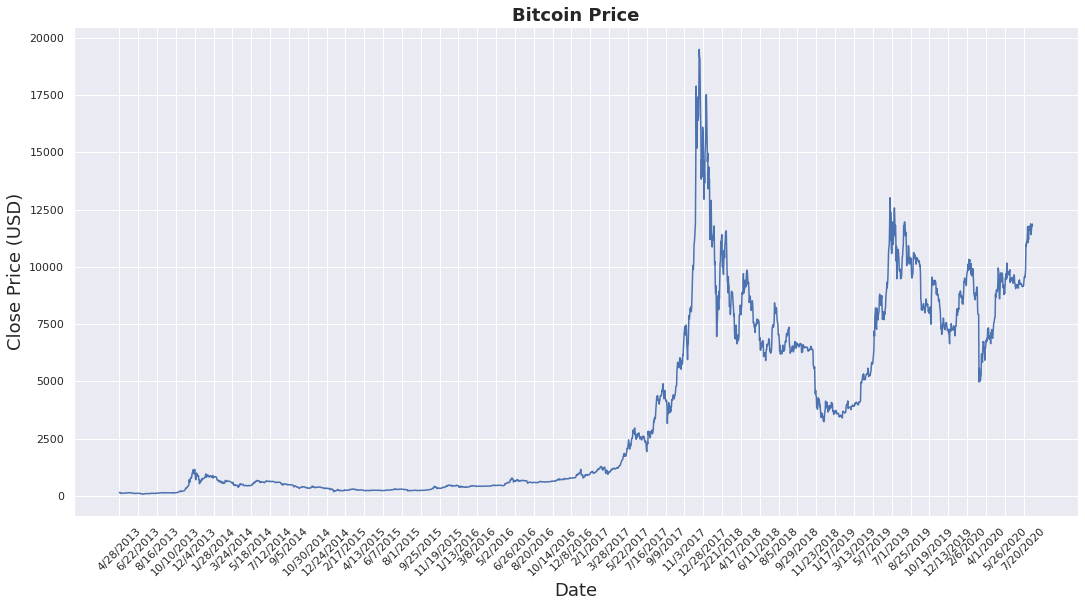

In [16]:
price = btc_data[['Close']]
plt.figure(figsize = (18,9))
plt.plot(price)
plt.xticks(range(0, btc_data.shape[0],55), btc_data['Date'].loc[::55],rotation=45)
plt.title("Bitcoin Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

#XLM

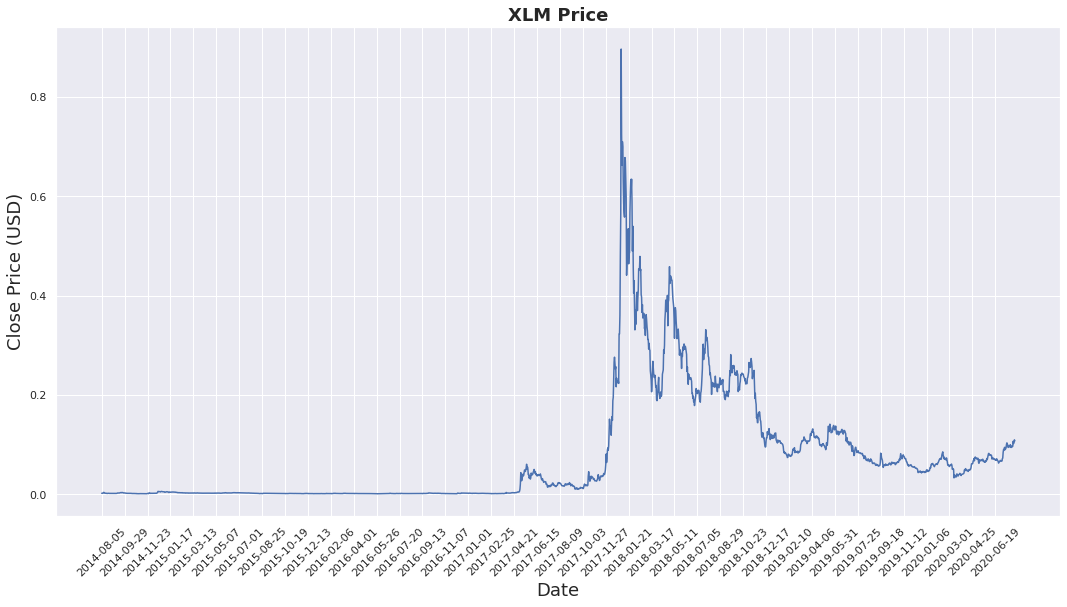

In [17]:
xlm_price = xlm_data[['Close']]

plt.figure(figsize = (18,9))
plt.plot(xlm_price)
plt.xticks(range(0, xlm_data.shape[0],55), xlm_data['Date'].loc[::55],rotation=45)
plt.title("XLM Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2642 entries, 0 to 2641
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2642 non-null   float64
dtypes: float64(1)
memory usage: 20.8 KB


In [18]:
recent_price = pd.DataFrame(btc_data['Close'][-6::])

In [19]:
price.tail()

,Close
2662,11410.53
2663,11584.93
2664,11784.14
2665,11768.87
2666,11865.70


In [20]:
recent_price

,Close
2661,11878.11
2662,11410.53
2663,11584.93
2664,11784.14
2665,11768.87
2666,11865.70


In [21]:
type(price)

pandas.core.frame.DataFrame

In [ ]:
del model

In [22]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

norm_data = min_max_scaler.fit_transform(price.values)
norm_preds = min_max_scaler.fit_transform(recent_price.values)

In [23]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [24]:
len(norm_data)

2667

#The next split for norm_data is relevant to create our train/test

In [26]:
past_history = 5
future_target = 1



x_train, y_train = univariate_data(norm_data,
                                   0,
                                   2120,
                                   past_history,
                                   future_target)

x_test, y_test = univariate_data(norm_data,
                                 2121,
                                 2666,
                                 past_history,
                                 future_target)

pred_test, y_pred = univariate_data(norm_preds, 0, None, past_history, future_target)

In [ ]:
x_test

array([[[0.18641029],
        [0.18426093],
        [0.18452342],
        [0.18341888],
        [0.18263706]],

       [[0.18426093],
        [0.18452342],
        [0.18341888],
        [0.18263706],
        [0.18283934]],

       [[0.18452342],
        [0.18341888],
        [0.18263706],
        [0.18283934],
        [0.18330153]],

       ...,

       [[0.57323986],
        [0.60109157],
        [0.60277719],
        [0.59360018],
        [0.6014534 ]],

       [[0.60109157],
        [0.60277719],
        [0.59360018],
        [0.6014534 ],
        [0.59742282]],

       [[0.60277719],
        [0.59360018],
        [0.6014534 ],
        [0.59742282],
        [0.60783871]]])

In [ ]:
pred_test

array([], dtype=float64)

In [27]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout

num_units = 80
learning_rate = 0.00001
activation_function = 'sigmoid'
adam = Adam(lr=learning_rate)
loss_function = 'mse'
batch_size = 5
num_epochs = 70

# Initialize the RNN
model = Sequential()
model.add(LSTM(units = num_units, return_sequences=True, input_shape=(None, 1)))
model.add(LSTM(units = num_units, return_sequences=True, input_shape=(None,80)))
model.add(LSTM(units = num_units, activation=activation_function, input_shape=(None,80)))
model.add(LeakyReLU(alpha=0.5))
model.add(Dropout(0.15))
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer=adam, loss=loss_function)

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 80)          26240     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 80)          51520     
_________________________________________________________________
lstm_2 (LSTM)                (None, 80)                51520     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 80)                0         
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 81        
Total params: 129,361
Trainable params: 129,361
Non-trainable params: 0
__________________________________________________

Epoch 1/70
381/381 [==============================] - 4s 11ms/step - loss: 0.0583 - val_loss: 0.0148
Epoch 2/70
381/381 [==============================] - 3s 8ms/step - loss: 0.0641 - val_loss: 0.0160
Epoch 3/70
381/381 [==============================] - 3s 9ms/step - loss: 0.0636 - val_loss: 0.0163
Epoch 4/70
381/381 [==============================] - 3s 8ms/step - loss: 0.0597 - val_loss: 0.0154
Epoch 5/70
381/381 [==============================] - 3s 8ms/step - loss: 0.0641 - val_loss: 0.0156
Epoch 6/70
381/381 [==============================] - 3s 9ms/step - loss: 0.0592 - val_loss: 0.0125
Epoch 7/70
381/381 [==============================] - 3s 8ms/step - loss: 0.0602 - val_loss: 0.0113
Epoch 8/70
381/381 [==============================] - 3s 8ms/step - loss: 0.0549 - val_loss: 0.0093
Epoch 9/70
381/381 [==============================] - 3s 8ms/step - loss: 0.0511 - val_loss: 0.0073
Epoch 10/70
381/381 [==============================] - 3s 8ms/step - loss: 0.0495 - val_loss: 0.005

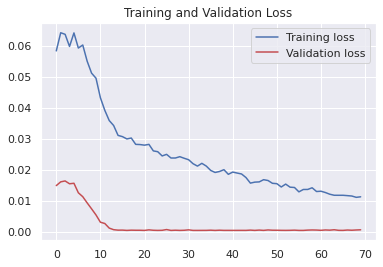

In [29]:
history = model.fit(
    x_train,
    y_train,
    validation_split=0.1,
    batch_size=batch_size,
    epochs=num_epochs,
    shuffle=False
)

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

[]

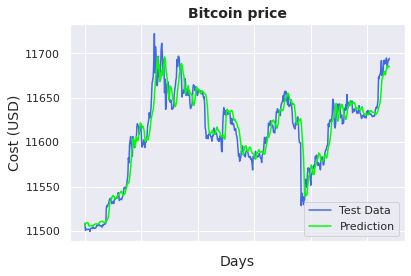

In [30]:
original = pd.DataFrame(min_max_scaler.inverse_transform(y_test))
predictions = pd.DataFrame(min_max_scaler.inverse_transform(model.predict(x_test)))

ax = sns.lineplot(x=original.index, y=original[0], label="Test Data", color='royalblue')
ax = sns.lineplot(x=predictions.index, y=predictions[0], label="Prediction", color='lime')
ax.set_title('Bitcoin price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)

In [31]:
original

,0
0,11508.577796
1,11500.585436
2,11502.324695
3,11501.642661
4,11501.563002
...,...
535,11683.490384
536,11687.687516
537,11692.481729
538,11692.114239


In [32]:
predictions

,0
0,11505.222656
1,11508.102539
2,11508.831055
3,11509.296875
4,11509.070312
...,...
535,11685.880859
536,11685.670898
537,11684.784180
538,11685.627930


In [66]:
import matplotlib.pyplot as plt

fibs = pd.DataFrame(original)

price_min = fibs.min()
price_max = fibs.max()

In [67]:
price_min = int(price_min)
price_min

11499

In [68]:
price_max = int(price_max)
price_max

11722

No handles with labels found to put in legend.


Level Price
0  11722
0.236 11669.372
0.382 11636.814
0.618 11584.186
1  11499


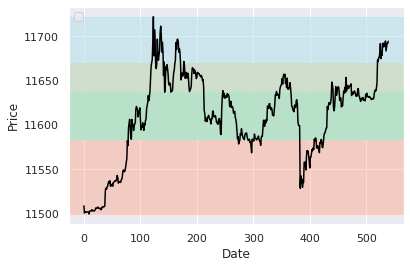

In [70]:
diff = price_max - price_min

level1 = price_max - 0.236 * diff
level2 = price_max - 0.382 * diff
level3 = price_max - 0.618 * diff

print("Level", "Price")
print("0 ", price_max)
print("0.236", level1)
print("0.382", level2)
print("0.618", level3)
print("1 ", price_min)



fig, ax = plt.subplots()
ax.plot(original, color='black')
ax.axhspan(level1, price_min, alpha=0.4, color='lightsalmon')
ax.axhspan(level2, level1, alpha=0.5, color='palegoldenrod')
ax.axhspan(level3, level2, alpha=0.5, color='palegreen')
ax.axhspan(price_max, level3, alpha=0.5, color='powderblue')

plt.ylabel("Price")
plt.xlabel("Date")
plt.legend(loc=2)
plt.show()

In [ ]:
len(x_test)

#The next cell allows us to make a prediction from the final days on the dataset we gather from coinbase or coinmarketcap

In [37]:
ends = original[-7::]
ends_test = min_max_scaler.fit_transform(ends.values)
pred_test, y_pred = univariate_data(ends_test, 0, 6, past_history, future_target)
new_preds = pd.DataFrame(min_max_scaler.inverse_transform(model.predict(pred_test)))

In [38]:
new_preds

,0
0,11689.962891


In [39]:
ends = ends.append(new_preds)

In [40]:
pred_again = ends[-7::]
ends_test = min_max_scaler.fit_transform(pred_again.values)
pred_test, y_pred = univariate_data(ends_test, 0, 6, past_history, future_target)
new_pred_again = pd.DataFrame(min_max_scaler.inverse_transform(model.predict(pred_test)))

In [ ]:
new_pred_again

,0
0,11457.305664
